## Imports

In [502]:
import sklearn as skl
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

---
## Dataset

O Dataset de teino é constituido por 18835 casos e pelos seguintes atributos:

* **song name:** nome da música
* **song_popularity:** valores entre 0 e 100
* **song_duration_ms:** duração da música em milisegundos; tipicamente valores entre 200k e 300k
* **acousticness:** valores entre 0 e 1
* **danceability:** valores entre 0 e 1
* **energy:** valores entre 0 e 1
* **instrumentalness:** valores entre 0 e 1
* **key:** todas as chaves em oitava codificadas como valores entre 0 e 11, começando com C como 0, C como 1, etc.
* **liveness:** valores entre 0 e 1
* **loudness:** float com valores tipicamente entre -60 e 0
* **audio_mode:** 0 = menor, 1 = maior
* **speechiness:** valores entre 0 e 1
* **tempo:** float com valores tipicamente entre 50 e 150
* **audio_valence:** quão felizes a feliz a música é; valores entre 0 e 1
* **time-signature:** valores entre 1 e 5

---
## Get Data

In [503]:
song_df = pd.read_csv('song_data.csv')
song_df.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [504]:
song_df.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


In [505]:
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


In [506]:
song_df.isna().sum()

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

In [507]:
song_df.nunique()

song_name           13070
song_popularity       101
song_duration_ms    11771
acousticness         3209
danceability          849
energy               1132
instrumentalness     3925
key                    12
liveness             1425
loudness             8416
audio_mode              2
speechiness          1224
tempo               12112
time_signature          5
audio_valence        1246
dtype: int64

In [508]:
# How many songs are duplicated?
song_df.duplicated().sum()

3909

In [509]:
# Min and max values for each column
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

song_df.apply(minMax)


,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
min,"""40"" - Live Version 1983",0,12000,0.000001,0.000,0.00107,0.000,0,0.0109,-38.768,0,0.000,0.000,0,0.000
max,피 땀 눈물,100,1799346,0.996000,0.987,0.99900,0.997,11,0.9860,1.585,1,0.941,242.318,5,0.984


<AxesSubplot: >

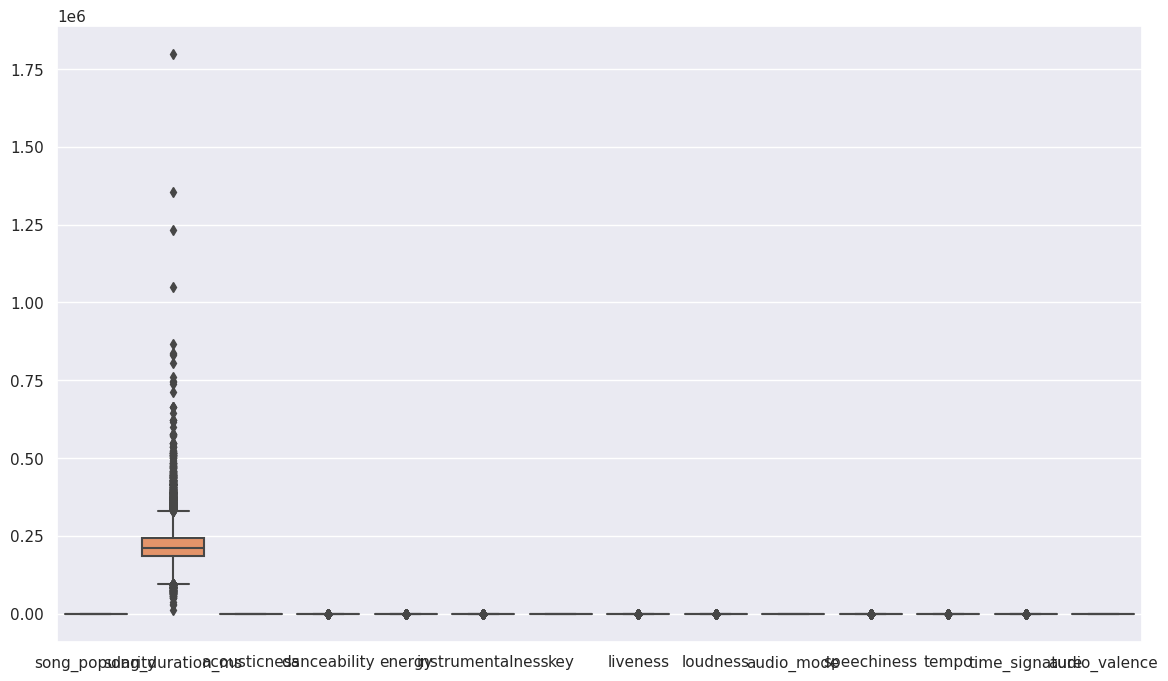

In [510]:
# Outliers boxplot seaborn
sns.set_theme(palette="pastel")
plt.subplots(figsize=(14,8))
sns.boxplot(data=song_df)

<AxesSubplot: >

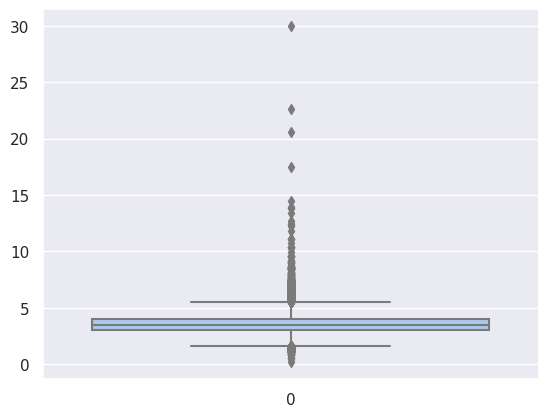

In [511]:
# Outliers em minutos
sns.boxplot(data=song_df['song_duration_ms'].apply(lambda x: x/60000))

/tmp/ipykernel_693/2818641056.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(song_df.corr(), annot = True, cmap='coolwarm')


<AxesSubplot: >

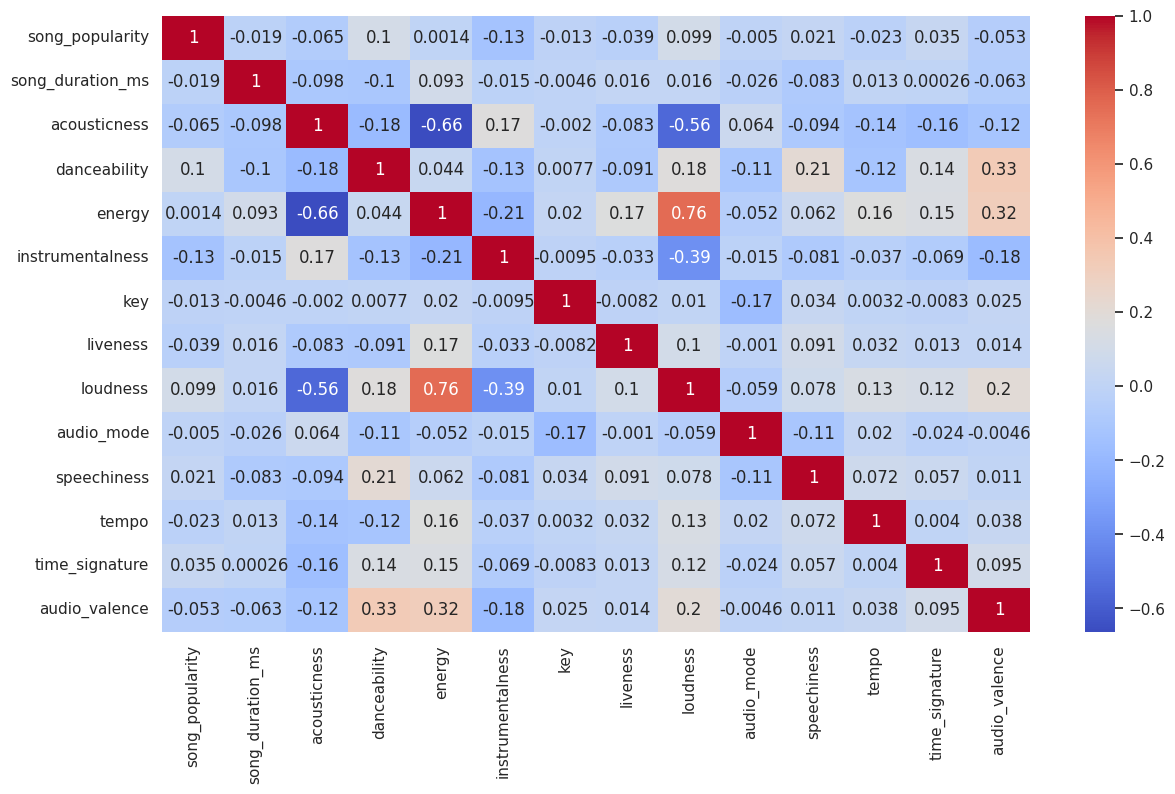

In [512]:
plt.subplots(figsize=(14,8))
sns.heatmap(song_df.corr(), annot = True, cmap='coolwarm')

In [513]:
#song_df.plot(kind="scatter",x="liveness",y="song_popularity", figsize=(9,9), color="black");

---
## Limpeza de Dados


In [514]:
#Remover duplicados
song_df = song_df.drop_duplicates()

#Remover nome
song_df = song_df.drop(['song_name'], axis=1)


In [515]:
#One Hot Encoding
for i in song_df.columns:
    if song_df[i].nunique() == 2:
        song_df[i] = pd.get_dummies(song_df[i], drop_first=True, prefix=i)
    elif song_df[i].nunique() > 2 and song_df[i].nunique() < 16:
        song_df = pd.concat([song_df, pd.get_dummies(song_df[i], prefix=i)], axis=1)
        song_df = song_df.drop([i], axis=1)


#song_df['loudness'].describe()
#song_df.apply(minMax)

In [516]:
#Remoção de outliers usando o IQR

for i in song_df.columns:
    if(song_df[i].nunique() >= 16):#Não categoricos
        mean=song_df[i].mean()

        skewness=song_df[i].skew()

        if(skewness > 0.5 or skewness < -0.5):#Distriuido normalmente
            upper=song_df[i].mean() + 3*song_df[i].std()
            lower=song_df[i].mean() - 3*song_df[i].std()

            song_df = song_df[(song_df[i] <= upper) & (song_df[i] >= lower)]
            song_df = song_df.reset_index(drop=True) 
        else:#Distriuido não normalmente(Skewed)
            q1 = song_df[i].quantile(0.25)
            q3 = song_df[i].quantile(0.75)
            iqr = q3 - q1
            upper = q3 + 1.5*iqr
            lower = q1 - 1.5*iqr

            song_df = song_df[(song_df[i] <= upper) & (song_df[i] >= lower)]
            song_df = song_df.reset_index(drop=True) 

In [517]:
for i in song_df.columns:
        max_value = song_df[i].max()
        min_value = song_df[i].min()
        song_df[i] = (song_df[i] - min_value) / (max_value - min_value)

song_df.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,audio_mode,speechiness,...,key_7,key_8,key_9,key_10,key_11,time_signature_0,time_signature_1,time_signature_3,time_signature_4,time_signature_5
count,12941.000000,12941.000000,12941.000000,12941.000000,12941.000000,12941.000000,12941.000000,12941.000000,12941.000000,12941.000000,...,12941.000000,12941.000000,12941.000000,12941.000000,12941.000000,12941.000000,12941.000000,12941.000000,12941.000000,12941.000000
mean,0.492324,0.449294,0.250052,0.547854,0.645850,0.047807,0.254542,0.536646,0.635190,0.179784,...,0.110888,0.071246,0.095356,0.068851,0.082219,0.000077,0.003555,0.039719,0.946063,0.010587
std,0.205665,0.140494,0.278718,0.192508,0.210977,0.162064,0.185186,0.161531,0.481395,0.220525,...,0.314005,0.257246,0.293717,0.253210,0.274709,0.008791,0.059517,0.195305,0.225902,0.102349
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.380000,0.358749,0.022990,0.421255,0.500940,0.000000,0.131991,0.443858,0.000000,0.037181,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.520000,0.434844,0.129516,0.558259,0.671121,0.000014,0.180003,0.568026,1.000000,0.081123,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.640000,0.524755,0.413653,0.688860,0.816246,0.001821,0.331793,0.654889,1.000000,0.222569,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


---
## Linear Regression

In [518]:
from sklearn import linear_model

In [519]:
# Initialize model
regression_model =  linear_model.LinearRegression()

# Train the model using the song_df data
regression_model.fit(X = pd.DataFrame(song_df["danceability"]),y = song_df["song_popularity"])

# Check trained model y-intercept
print(regression_model.intercept_)

# Check trained model coefficients 
print(regression_model.coef_)


0.4524678689066641
[0.0727489]


The coefficient is telling us that as the danceability increases by 1 unit, the song popularity increases 14   

We can get a sense of how much of the variance in the response variable is explained by the model using the model.score() function:

About 1% of the variance in the song_popularity can be explained by the danceability.

In [520]:
regression_model.score(X = pd.DataFrame(song_df["danceability"]),y = song_df["song_popularity"])

0.004636942492163287

Residuals are diffrences between what the model predicst for each data point and the actual value of each data point.
## Extraction of the model's residuals

In [521]:
train_prediction = regression_model.predict(X = pd.DataFrame(song_df["danceability"]))

# Actual - prediction = residuals
residuals = song_df["song_popularity"] - train_prediction

residuals.describe()

count    1.294100e+04
mean    -2.525691e-17
std      2.051872e-01
min     -5.236332e-01
25%     -1.162538e-01
50%      3.014650e-02
75%      1.502728e-01
max      5.027278e-01
Name: song_popularity, dtype: float64

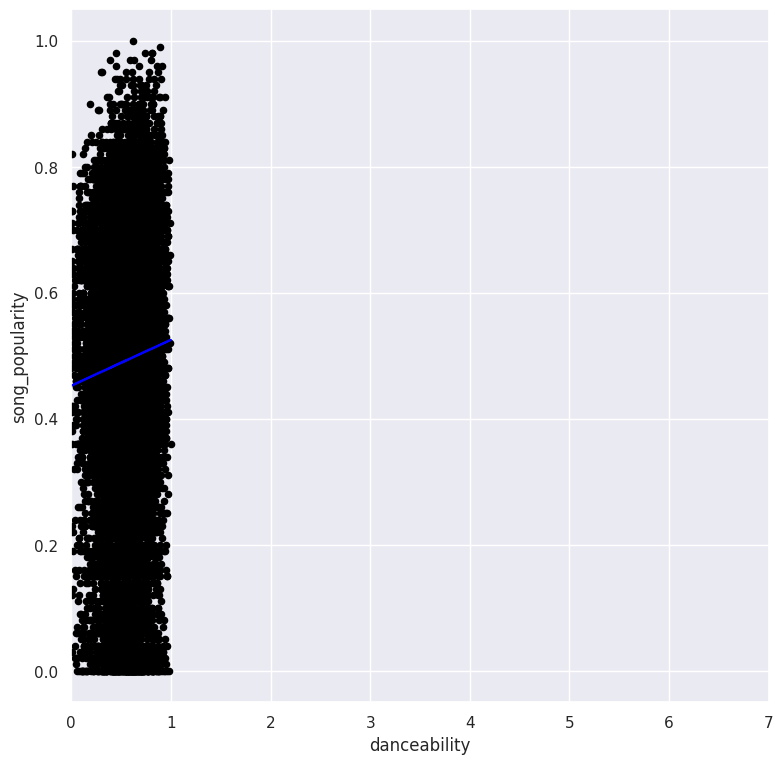

In [522]:
song_df.plot(kind="scatter",x="danceability",y="song_popularity",figsize=(9,9),color="black",xlim=(0,7))

# Plot regression line
plt.plot(song_df["danceability"],   # Explanitory variable
        train_prediction,           # Predicted values
        color="blue");


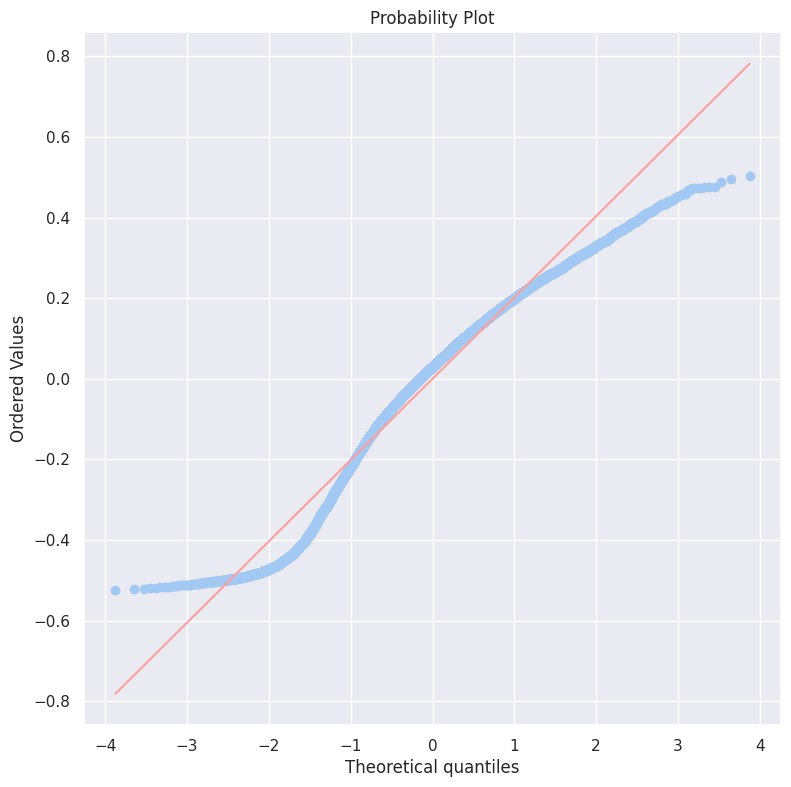

In [523]:
import scipy.stats as stats
plt.figure(figsize=(9,9))
stats.probplot(residuals, dist="norm", plot=plt);


## Root mean squared error metric evaluation

In [524]:
def rmse(predicted, targets):
    """
    Computes root mean squared error of two numpy ndarrays
    
    Args:
        predicted: an ndarray of predictions
        targets: an ndarray of target values
    
    Returns:
        The root mean squared error as a float
    """
    return (np.sqrt(np.mean((targets-predicted)**2)))

rmse(train_prediction, song_df["song_popularity"])

0.20517922388167545

In [525]:
from sklearn.metrics import mean_squared_error

RMSE = mean_squared_error(train_prediction, song_df["song_popularity"])**0.5
RMSE

0.20517922388167545

---
## Polynomial Regression

In [526]:
# Initialize model
poly_model = linear_model.LinearRegression()

# Make a DataFrame of predictor variables
predictors = pd.DataFrame([ song_df["danceability"],        # Include danceability    
                            song_df["danceability"]**2]).T  # Include danceability squared

# Train the model using song_df data
poly_model.fit(X = predictors, y = song_df["song_popularity"])

# Check trained model y-intercept
print("Model intercept")
print(regression_model.intercept_)

# Check trained model coefficients 
print("Model coefficients")
print(poly_model.coef_)

# Check R-squared
print("Model R-squared")
print(poly_model.score(X = predictors, y = song_df["song_popularity"]))


Model intercept
0.4524678689066641
Model coefficients
[ 0.10151512 -0.02755063]
Model R-squared
0.004675800090879423


/home/nagasaki/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


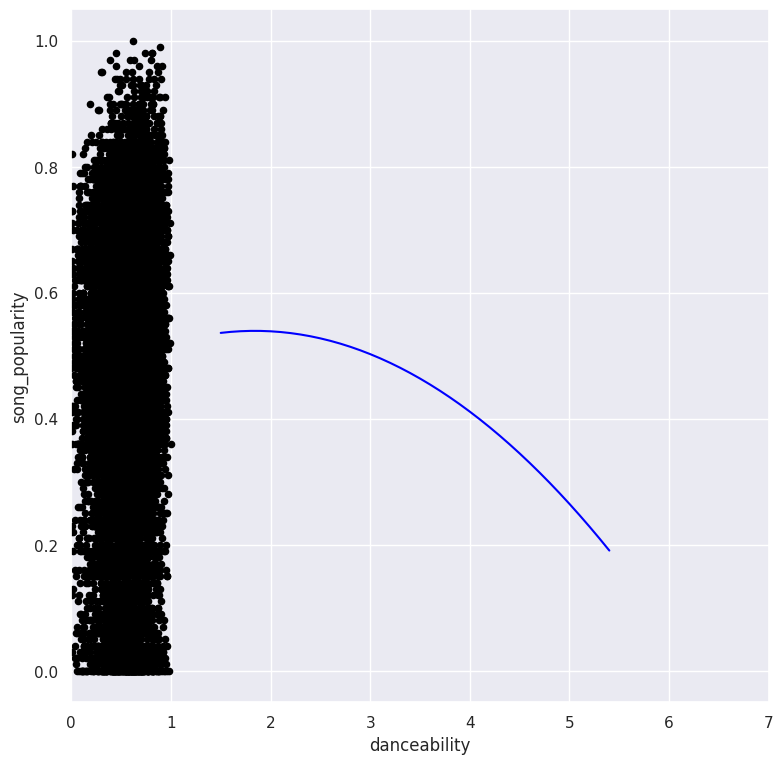

In [527]:
# Plot the curve from q.5 to 5.5
poly_line_range = np.arange(1.5, 5.5, 0.1)

# Get first and second order predictors from range
poly_predictors = pd.DataFrame([poly_line_range,poly_line_range**2]).T

# Get corresponding y values from the model
y_values = poly_model.predict(X = poly_predictors)

song_df.plot(kind="scatter",x="danceability",y="song_popularity",figsize=(9,9),color="black",xlim=(0,7))

# Plot curve line 
plt.plot(poly_line_range,   # X-axis range
        y_values,           # Predicted values
        color="blue");

In [528]:
preds = poly_model.predict(X=predictors)
rmse(preds,song_df["song_popularity"])

0.2051752188858604

---
## Multiple Linear Regression

In [529]:
# Initialize model
multi_reg_model =  linear_model.LinearRegression()

# Train the model using the song_df data
multi_reg_model.fit(X = song_df.loc[:,["danceability", "loudness"]], y = song_df["song_popularity"])

# Check trained model y-intercept
print(multi_reg_model.intercept_)

# Check trained model coefficients (scaling factor given to "danceability")
print(multi_reg_model.coef_)

# Check R-squared
multi_reg_model.score(X = song_df.loc[:,["danceability","loudness"]], y = song_df["song_popularity"])


0.4045699518912964
[0.06747153 0.09464175]


0.010137850550058336

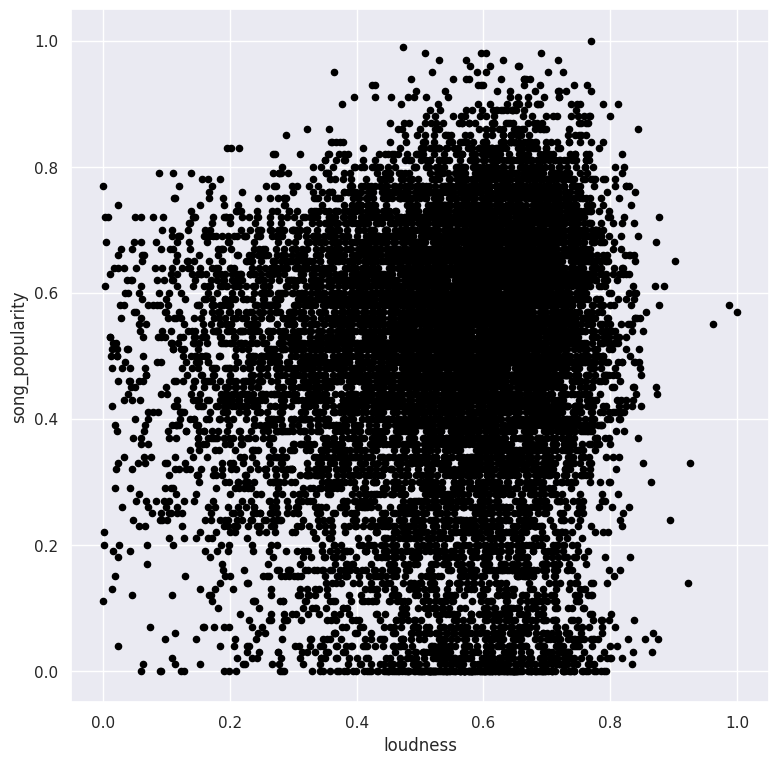

In [530]:
song_df.plot(kind="scatter",x="loudness",y="song_popularity",figsize=(9,9),color="black");

---
## Final Multiple Regression Model

In [531]:
# Initialize model
multi_reg_model =  linear_model.LinearRegression()

# Include squared terms
poly_predictors = pd.DataFrame([song_df["danceability"],song_df["loudness"],song_df["danceability"]**2,song_df["loudness"]**2]).T

# Train the model using the song_df data
multi_reg_model.fit(X = poly_predictors, y = song_df["song_popularity"])

# Check R-squared
print("R-squared")
print(multi_reg_model.score(X = poly_predictors, y = song_df["song_popularity"]))

# Check RMSE
print("RMSE")
print(rmse(multi_reg_model.predict(X = poly_predictors), song_df["song_popularity"]))


R-squared
0.010196141183974716
RMSE
0.20460544873374858


---
## Logistic Regression